**Image Classification with Convolutional Neural Networks (CNNs) and Model Comparison**

1. Import Libraries




In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


2. Load and Preprocess Data

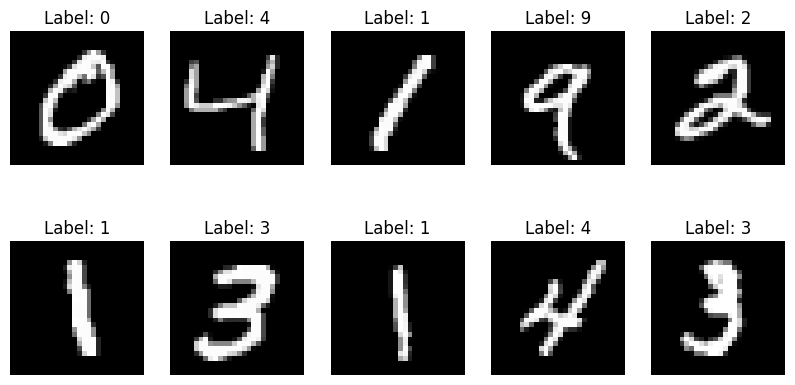

In [5]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# EDA: Visualize some samples
plt.figure(figsize=(10, 5))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.show()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape data to fit CNN input shape (28x28x1)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to one-hot encoding for CNN
train_labels_cnn = tf.keras.utils.to_categorical(train_labels, 10)
test_labels_cnn = tf.keras.utils.to_categorical(test_labels, 10)


3. Exploratory Data Analysis (EDA)

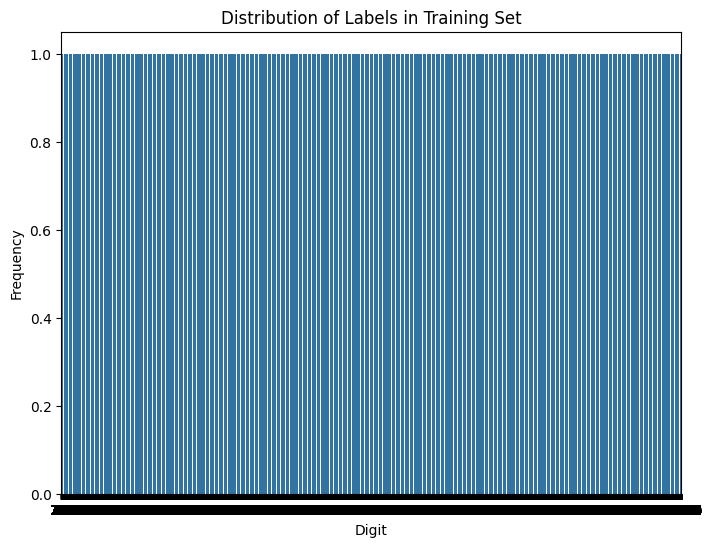

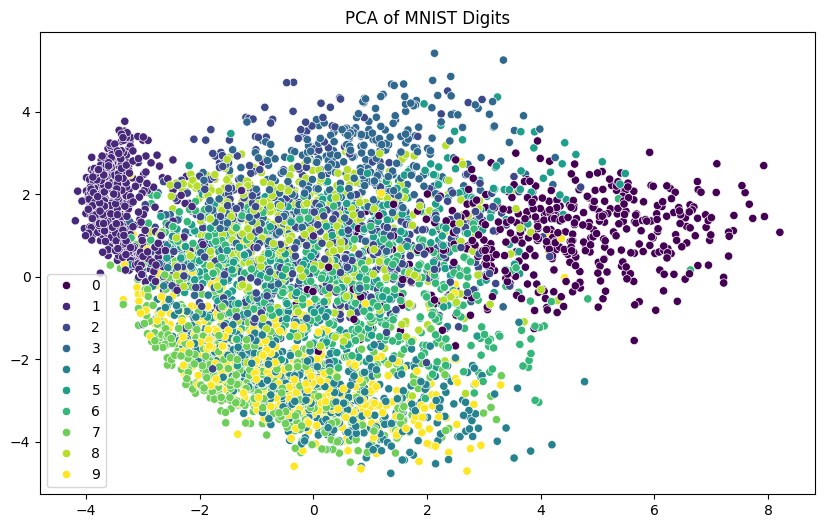

In [6]:
# Flatten images for EDA and traditional machine learning models
train_images_flat = train_images.reshape(-1, 28*28)
test_images_flat = test_images.reshape(-1, 28*28)

# Check distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(train_labels)
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()

# PCA for visualization
pca = PCA(n_components=2)
train_images_pca = pca.fit_transform(train_images_flat[:5000])  # Use a subset for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_images_pca[:, 0], y=train_images_pca[:, 1], hue=train_labels[:5000], palette="viridis", legend='full')
plt.title('PCA of MNIST Digits')
plt.show()


4. Build and Train CNN Model

In [12]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(train_images, train_labels_cnn,
                            epochs=5,
                            batch_size=64,
                            validation_split=0.1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.8568 - loss: 0.4772 - val_accuracy: 0.9853 - val_loss: 0.0509
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 73s 64ms/step - accuracy: 0.9820 - loss: 0.0579 - val_accuracy: 0.9868 - val_loss: 0.0454
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.9888 - loss: 0.0346 - val_accuracy: 0.9870 - val_loss: 0.0452
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 53s 63ms/step - accuracy: 0.9904 - loss: 0.0306 - val_accuracy: 0.9908 - val_loss: 0.0331
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.9934 - loss: 0.0205 - val_accuracy: 0.9915 - val_loss: 0.0318


5. Train and Test Other Models

In [8]:
# Standardize data for SVM and Random Forest
scaler = StandardScaler()
train_images_flat_scaled = scaler.fit_transform(train_images_flat)
test_images_flat_scaled = scaler.transform(test_images_flat)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_images_flat_scaled, train_labels)
rf_predictions = rf_model.predict(test_images_flat_scaled)

# Support Vector Machine Classifier
svm_model = SVC(kernel='rbf')
svm_model.fit(train_images_flat_scaled, train_labels)
svm_predictions = svm_model.predict(test_images_flat_scaled)


6. Evaluate All Models

313/313 - 3s - 8ms/step - accuracy: 0.9899 - loss: 0.0335

CNN Test accuracy: 0.9898999929428101

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Random Forest Confusion Matrix:


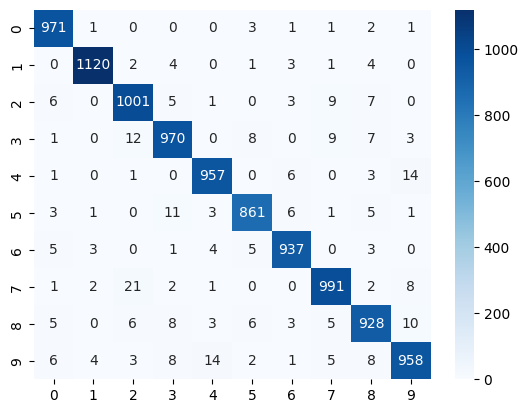


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


SVM Confusion Matrix:


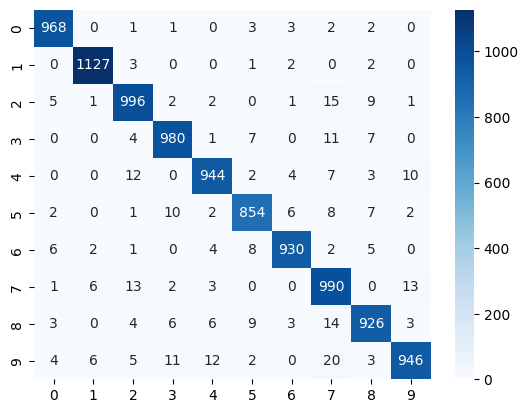

In [9]:
# Evaluate CNN Model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels_cnn, verbose=2)
print(f'\nCNN Test accuracy: {cnn_test_acc}')

# Evaluate Random Forest
print('\nRandom Forest Classification Report:')
print(classification_report(test_labels, rf_predictions))
print('\nRandom Forest Confusion Matrix:')
sns.heatmap(confusion_matrix(test_labels, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.show()

# Evaluate SVM
print('\nSVM Classification Report:')
print(classification_report(test_labels, svm_predictions))
print('\nSVM Confusion Matrix:')
sns.heatmap(confusion_matrix(test_labels, svm_predictions), annot=True, fmt='d', cmap='Blues')
plt.show()


7. Combine Models (Hybrid Approach)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step

Hybrid Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.92      0.97      0.95       982
           5       0.93      0.97      0.95       892
           6       0.94      0.97      0.96       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.96      0.97       974
           9       1.00      0.94      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Hybrid Model Confusion Matrix:


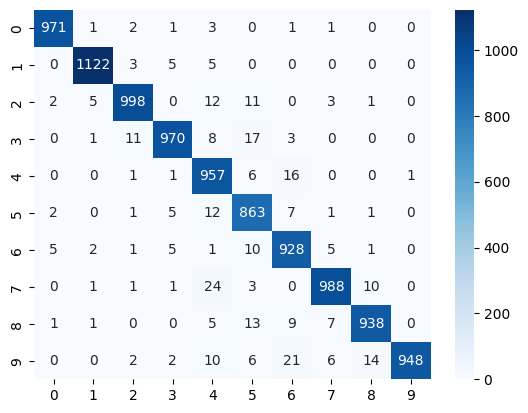

In [10]:
# Simple hybrid approach: Averaging predictions (CNN + Random Forest)
cnn_predictions = cnn_model.predict(test_images)
cnn_pred_labels = np.argmax(cnn_predictions, axis=1)

# Convert one-hot encoded labels back to integers for SVM and Random Forest
hybrid_predictions = (cnn_pred_labels + rf_predictions) // 2  # Simple averaging

print('\nHybrid Model Classification Report:')
print(classification_report(test_labels, hybrid_predictions))
print('\nHybrid Model Confusion Matrix:')
sns.heatmap(confusion_matrix(test_labels, hybrid_predictions), annot=True, fmt='d', cmap='Blues')
plt.show()


8. Plot Training and Validation Results for CNN

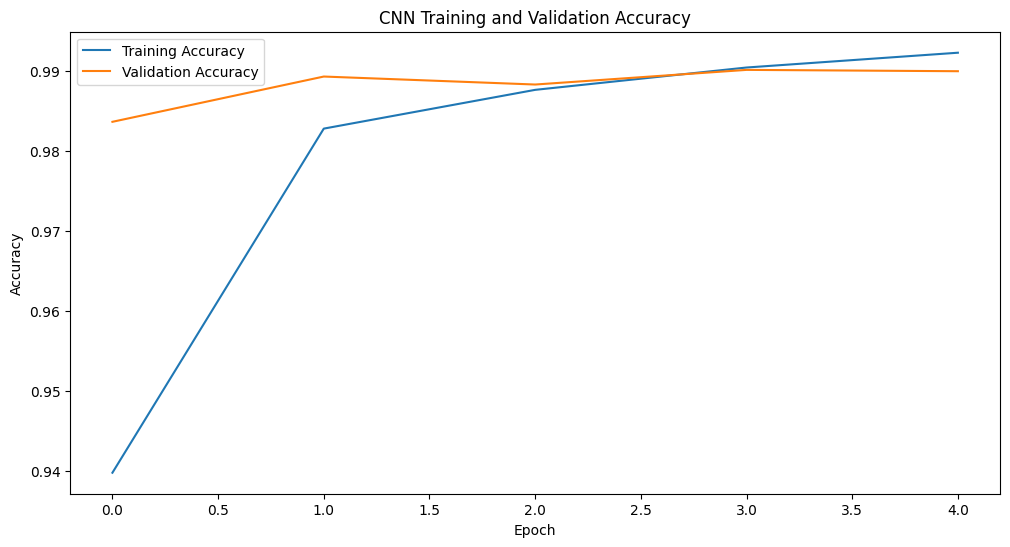

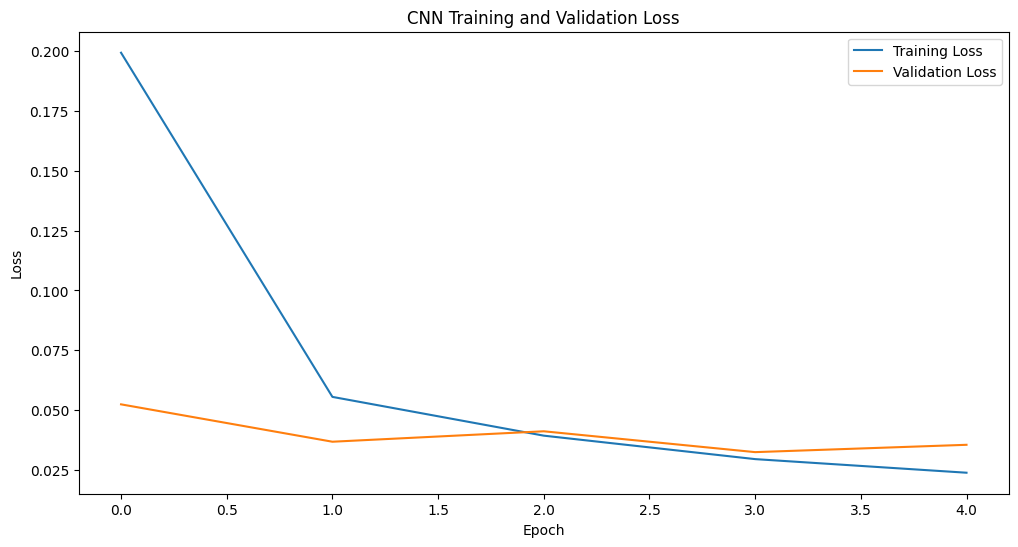

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


CNN Accuracy: 0.9899
Random Forest Accuracy: 0.9694
SVM Accuracy: 0.9661
Hybrid Model Accuracy: 0.9683


<ipython-input-13-d53c39449289>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


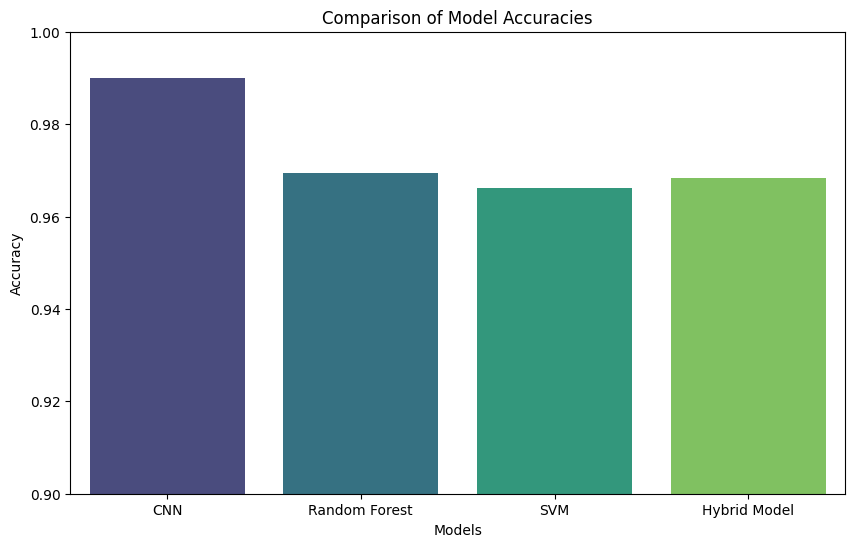

In [13]:
# Calculate accuracy for Random Forest and SVM
rf_accuracy = np.mean(rf_predictions == test_labels)
svm_accuracy = np.mean(svm_predictions == test_labels)

# Calculate accuracy for the Hybrid model
hybrid_accuracy = np.mean(hybrid_predictions == test_labels)

# Print all accuracies
print(f'CNN Accuracy: {cnn_test_acc:.4f}')
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print(f'SVM Accuracy: {svm_accuracy:.4f}')
print(f'Hybrid Model Accuracy: {hybrid_accuracy:.4f}')

# Compare accuracies in a bar chart
model_names = ['CNN', 'Random Forest', 'SVM', 'Hybrid Model']
accuracies = [cnn_test_acc, rf_accuracy, svm_accuracy, hybrid_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Adjust the y-axis limit to focus on the accuracy range
plt.show()


More models used for comparison KNN and MLP

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_images_flat_scaled, train_labels)
knn_predictions = knn_model.predict(test_images_flat_scaled)

# Multilayer Perceptron (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=10, alpha=1e-4,
                           solver='adam', verbose=10, random_state=42,
                           learning_rate_init=.001)
mlp_model.fit(train_images_flat_scaled, train_labels)
mlp_predictions = mlp_model.predict(test_images_flat_scaled)

# Calculate accuracy for KNN and MLP
knn_accuracy = np.mean(knn_predictions == test_labels)
mlp_accuracy = np.mean(mlp_predictions == test_labels)

# Print all accuracies including the new models
print(f'KNN Accuracy: {knn_accuracy:.4f}')
print(f'MLP Accuracy: {mlp_accuracy:.4f}')


Iteration 1, loss = 0.32074522
Iteration 2, loss = 0.11288823
Iteration 3, loss = 0.07185928
Iteration 4, loss = 0.05008792
Iteration 5, loss = 0.03695466
Iteration 6, loss = 0.02590331
Iteration 7, loss = 0.01971037
Iteration 8, loss = 0.01426769
Iteration 9, loss = 0.01118321
Iteration 10, loss = 0.01171474
KNN Accuracy: 0.9443
MLP Accuracy: 0.9743


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
# Hybrid Model 1: Average of CNN and MLP predictions
cnn_predictions = cnn_model.predict(test_images)
cnn_pred_labels = np.argmax(cnn_predictions, axis=1)

hybrid_predictions_mlp = (cnn_pred_labels + mlp_predictions) // 2


# Calculate accuracy for the new hybrid models
hybrid_mlp_accuracy = np.mean(hybrid_predictions_mlp == test_labels)


# Print hybrid model accuracies
print(f'Hybrid Model (CNN + MLP) Accuracy: {hybrid_mlp_accuracy:.4f}')





313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Hybrid Model (CNN + MLP) Accuracy: 0.9721


<ipython-input-30-02084b359238>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


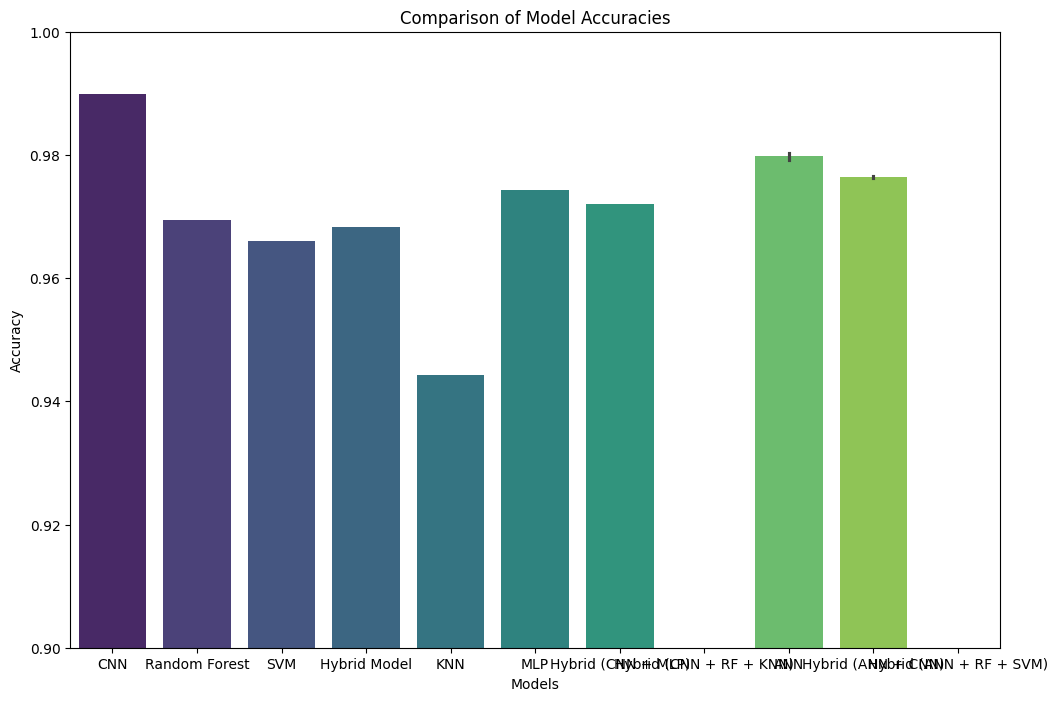

In [30]:
# Update the list of accuracies and model names
model_names.extend(['KNN', 'MLP', 'Hybrid (CNN + MLP)'])
accuracies.extend([knn_accuracy, mlp_accuracy, hybrid_mlp_accuracy])

# Plot the comparison of all models including new ones
plt.figure(figsize=(12, 8))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()


Implementing ANN

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the ANN model
ann_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input (28x28 pixels) into a 1D array
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class)
])

# Compile the model
ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the ANN model
ann_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the ANN model on the test set
ann_test_loss, ann_test_acc = ann_model.evaluate(test_images, test_labels, verbose=2)
print(f'ANN Test Accuracy: {ann_test_acc:.4f}')

# Get ANN predictions
ann_predictions = ann_model.predict(test_images)
ann_pred_labels = np.argmax(ann_predictions, axis=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8777 - loss: 0.4196 - val_accuracy: 0.9591 - val_loss: 0.1371
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9673 - loss: 0.1047 - val_accuracy: 0.9733 - val_loss: 0.0839
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9789 - loss: 0.0700 - val_accuracy: 0.9753 - val_loss: 0.0791
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9847 - loss: 0.0499 - val_accuracy: 0.9759 - val_loss: 0.0765
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9875 - loss: 0.0388 - val_accuracy: 0.9777 - val_loss: 0.0808
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9904 - loss: 0.0300 - val_accuracy: 0.9770 - val_loss: 0.0828
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9726 - val_loss: 0.0988
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9924 - loss: 0.

Hybrid Combinations with ANN
1. Hybrid Model (ANN + CNN): We can create a hybrid model by averaging the predictions of the ANN and CNN.
2. Hybrid Model (ANN + Random Forest + SVM): Another combination could involve using the ANN, Random Forest, and SVM models together using majority voting

Hybrid Model 1: ANN + CNN

In [26]:
# Hybrid Model: Average of ANN and CNN predictions
hybrid_ann_cnn_predictions = (cnn_pred_labels + ann_pred_labels) // 2
hybrid_ann_cnn_accuracy = np.mean(hybrid_ann_cnn_predictions == test_labels)

print(f'Hybrid Model (ANN + CNN) Accuracy: {hybrid_ann_cnn_accuracy:.4f}')


Hybrid Model (ANN + CNN) Accuracy: 0.9762


Hybrid Model 2: ANN + Random Forest + SVM

<ipython-input-27-3afc5e888411>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


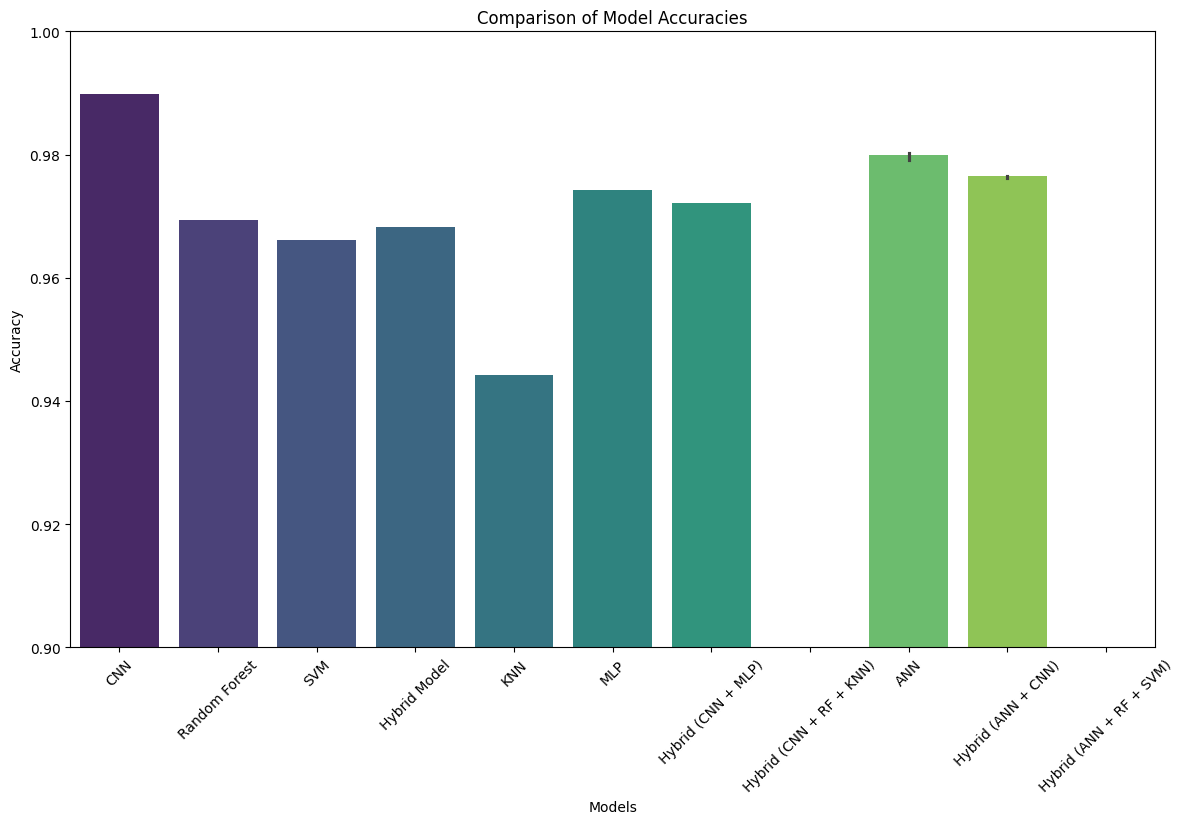

In [27]:
# Update the list of accuracies and model names
model_names.extend(['ANN', 'Hybrid (ANN + CNN)'])
accuracies.extend([ann_test_acc, hybrid_ann_cnn_accuracy])

# Plot the comparison of all models including new ones
plt.figure(figsize=(14, 8))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Adjust the y-axis limit to focus on the accuracy range
plt.xticks(rotation=45)
plt.show()
